# Imports etc.

In [1]:
import json
import numpy as np
import os
import pandas as pd
import plotnine as gg
import statsmodels.formula.api as smf
from Functions import *
gg.theme_set(gg.theme_classic)

In [2]:
data_dir = 'C:/Users/maria/MEGAsync/Berkeley/CHaRLy/data/RPP34'
plot_dir = data_dir + 'figures'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

# Get data

In [3]:
all_data = pd.read_csv(os.path.join(data_dir, 'all_data.csv'), index_col=0)
all_data['subtrial'] = all_data['subtrial'].astype(int)
all_data

C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (65,66) have mixed types.Specify dtype option on import or set low_memory=False.


,rt,stimulus,key_press,trial_type,trial_index,time_elapsed,internal_node_id,phase,block,trial,...,bool_unlocked_star_highRulesBoth,bool_unlocked_star_highRulesLearnOnly,bool_unlocked_star_highRulesTransferOnly,log_rt,bool_middle_item,bool_star,acc,middle_item_not,middle_item_both,chance_performer
0,797.865,0.0,85.0,learning,297.0,2422963.0,0.0-77.0-0.0,high,0.0,0.0,...,0.0,0.0,0.0,6.683192,False,False,0.0,NaN,NaN,False
1,654.720,0.0,73.0,learning,298.0,2423619.0,0.0-77.0-1.0,high,0.0,0.0,...,0.0,0.0,0.0,6.485734,True,False,0.0,NaN,0.0,False
2,1317.900,0.0,79.0,learning,299.0,2424938.0,0.0-77.0-2.0,high,0.0,0.0,...,0.0,0.0,0.0,7.184553,False,False,0.0,NaN,NaN,False
3,276.305,0.0,80.0,learning,300.0,2425216.0,0.0-77.0-3.0,high,0.0,0.0,...,0.0,0.0,0.0,5.625118,False,False,0.0,7.0,7.0,False
4,823.310,0.0,85.0,learning,302.0,2426546.0,0.0-78.0-0.0,high,0.0,1.0,...,0.0,0.0,0.0,6.714547,False,False,0.0,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251104,NaN,NaN,NaN,learning,NaN,NaN,NaN,low,0.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
251105,NaN,NaN,NaN,learning,NaN,NaN,NaN,low,0.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
251106,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
251107,NaN,NaN,NaN,transfer,NaN,NaN,NaN,low,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [4]:
rule_data = pd.read_csv(os.path.join(data_dir, 'rule_data.csv'), index_col=0)
rule_data.loc[(rule_data.phase == 'low') & (rule_data.sid == 13885)]

,sid,phase,goal_id,lowRules,highRules,lowTransferRules,highTransferRules,lowRulesBoth,lowRulesLearnOnly,lowRulesTransferOnly,highRulesBoth,highRulesLearnOnly,highRulesTransferOnly
1,13885,low,0,"[1, 2]","[3, 2]","[0, 2]",NaN,NaN,"[1, 2]","[0, 2]","[3, 2]",NaN,NaN
127,13885,low,1,"[3, 0]","[2, 0]","[3, 1]",NaN,NaN,"[3, 0]","[3, 1]","[2, 0]",NaN,NaN
253,13885,low,2,"[2, 3]","[1, 3]","[2, 3]",NaN,"[2, 3]",NaN,NaN,"[1, 3]",NaN,NaN
379,13885,low,3,"[0, 1]","[0, 1]","[0, 1]",NaN,"[0, 1]",NaN,NaN,"[0, 1]",NaN,NaN


In [5]:
rule_data.loc[(rule_data.phase == 'low') & (rule_data.sid == 39508)]

,sid,phase,goal_id,lowRules,highRules,lowTransferRules,highTransferRules,lowRulesBoth,lowRulesLearnOnly,lowRulesTransferOnly,highRulesBoth,highRulesLearnOnly,highRulesTransferOnly
121,39508,low,0,"[1, 2]","[1, 3]","[0, 2]",NaN,NaN,"[1, 2]","[0, 2]","[1, 3]",NaN,NaN
247,39508,low,1,"[0, 1]","[2, 1]","[0, 1]",NaN,"[0, 1]",NaN,NaN,"[2, 1]",NaN,NaN
373,39508,low,2,"[3, 0]","[3, 0]","[3, 1]",NaN,NaN,"[3, 0]","[3, 1]","[3, 0]",NaN,NaN
499,39508,low,3,"[2, 3]","[0, 2]","[2, 3]",NaN,"[2, 3]",NaN,NaN,"[0, 2]",NaN,NaN


In [6]:
# REMEMBER! RULE_DATA REFERS TO ACTION_ID -> MIDDLE_ITEM_NAME; AND MIDDLE_ITEM_NAME -> UNLOCKED_STAR_NAME
all_data.loc[
    (all_data['sid'] == 39508) & (all_data['phase'] == 'low') & (all_data['trial_type'] == 'learning'),
    ['sid', 'block', 'trial', 'subtrial', 'action_id', 'middle_item_name', 'unlocked_star_name']
][228:260]

,sid,block,trial,subtrial,action_id,middle_item_name,unlocked_star_name
239627,39508,2.0,7.0,0,1.0,NaN,NaN
239628,39508,2.0,7.0,1,2.0,0.0,NaN
239629,39508,2.0,7.0,2,3.0,NaN,NaN
239630,39508,2.0,7.0,3,0.0,2.0,3.0
239631,39508,2.0,8.0,0,3.0,NaN,NaN
239632,39508,2.0,8.0,1,0.0,2.0,NaN
239633,39508,2.0,8.0,2,2.0,NaN,NaN
239634,39508,2.0,8.0,3,1.0,NaN,-1.0
239635,39508,2.0,9.0,0,3.0,NaN,NaN
239636,39508,2.0,9.0,1,0.0,2.0,NaN


# Results

## First discovery of new star: based on known or unknown 2-key sequences?

In [66]:
# # REMEMBER! RULE_DATA REFERS TO ACTION_ID -> MIDDLE_ITEM_NAME; AND MIDDLE_ITEM_NAME -> UNLOCKED_STAR_NAME
# all_data[['sid', 'phase', 'trial_type', 'trial', 'subtrial', 'acc', 'action_id', 'middle_item_name', 'unlocked_star_name']]

In [67]:
# for item in range(4):
#     all_data['count_item{}'.format(item)] = all_data['middle_item_name'] == item
    
# for star in range(4):
#     all_data['count_star{}'.format(star)] = all_data['unlocked_star_name'] == star
    
# all_data

In [68]:
# id_cols = ['sid', 'phase', 'trial_type', 'block']
# count_cols = ['count_item{}'.format(i) for i in range(4)] + ['count_star{}'.format(s) for s in range(4)]

# new_columns = all_data[id_cols + count_cols].groupby(id_cols).cumsum()
# all_data = all_data.drop(columns=count_cols).join(new_columns)
# all_data

In [69]:
# def get_sid_phase_star_rules(all_data_row, star_id):

#     rule = rule_data.loc[
#         (rule_data['phase'] == all_data_row['phase']) & (rule_data['sid'] == all_data_row['sid']) & (rule_data['goal_id'] == star_id),
#         ['highRules']
#     ]
#     rule_string = rule.values[0][0]
#     rule_int = [int(n[1]) for n in rule_string.split(',')]
    
#     return rule_int

# # Example use
# get_sid_phase_star_rules(all_data.loc[0], star_id=0), get_sid_phase_star_rules(all_data.loc[0], star_id=1)

# test_dat = all_data[:30]
# test_dat['star_rule'] = test_dat.apply(get_sid_phase_star_rules, star_id=1, axis=1)
# test_dat

In [70]:
# def get_star_inplace(all_data_row):
    
#     has_item0 = (all_data_row['count_item{}'.format(all_data_row['star_rule'][0])] > 0)
#     has_item1 = (all_data_row['count_item{}'.format(all_data_row['star_rule'][1])] > 0)
    
#     return has_item0 & has_item1

# # Example use
# test_dat.apply(get_star_inplace, axis=1)

In [71]:
# for star_id in range(4):
    
#     print("Star {}".format(star_id))
    
#     all_data['star_rule'] = all_data.apply(get_sid_phase_star_rules, star_id=star_id, axis=1)
#     all_data['star{}_inplace'.format(star_id)] = all_data.apply(get_star_inplace, axis=1)

# all_data

In [13]:
id_cols = ['sid', 'phase', 'trial_type', 'block', 'trial', 'subtrial']
inplace_cols = ['star{}_inplace'.format(s) for s in range(4)]
all_data.sort_values(by=id_cols)[id_cols + ['action_id', 'middle_item_name'] + count_cols + inplace_cols][:30]

,sid,phase,trial_type,block,trial,subtrial,action_id,middle_item_name,count_item0,count_item1,count_item2,count_item3,count_star0,count_star1,count_star2,count_star3,star0_inplace,star1_inplace,star2_inplace,star3_inplace
0,13885,high,learning,0.0,0.0,0,0.0,NaN,0,0,0,0,0,0,0,0,False,False,False,False
1,13885,high,learning,0.0,0.0,1,1.0,0.0,1,0,0,0,0,0,0,0,False,False,False,False
2,13885,high,learning,0.0,0.0,2,3.0,NaN,1,0,0,0,0,0,0,0,False,False,False,False
3,13885,high,learning,0.0,0.0,3,2.0,NaN,1,0,0,0,0,0,0,0,False,False,False,False
4,13885,high,learning,0.0,1.0,0,0.0,NaN,1,0,0,0,0,0,0,0,False,False,False,False
5,13885,high,learning,0.0,1.0,1,2.0,NaN,1,0,0,0,0,0,0,0,False,False,False,False
6,13885,high,learning,0.0,1.0,2,3.0,NaN,1,0,0,0,0,0,0,0,False,False,False,False
7,13885,high,learning,0.0,1.0,3,1.0,NaN,1,0,0,0,0,0,0,0,False,False,False,False
8,13885,high,learning,0.0,2.0,0,0.0,NaN,1,0,0,0,0,0,0,0,False,False,False,False
9,13885,high,learning,0.0,2.0,1,3.0,NaN,1,0,0,0,0,0,0,0,False,False,False,False


In [34]:
id_cols = ['sid', 'phase', 'trial_type', 'block']
all_data3 = all_data.loc[all_data['subtrial'] == 3]

new_cols = all_data3[id_cols + inplace_cols].groupby(id_cols).cumsum()
new_cols.columns = ['{}_count'.format(c) for c in new_cols.columns]
# new_cols = all_data.loc[all_data['subtrial'] == 3, id_cols + inplace_cols].groupby(id_cols).cumsum()
new_cols[:30]

,star0_inplace_count,star1_inplace_count,star2_inplace_count,star3_inplace_count
3,0,0,0,0
7,0,0,0,0
11,0,0,0,0
15,0,0,0,0
19,0,0,0,0
23,0,1,1,0
27,0,2,2,0
31,0,3,3,0
35,0,4,4,0
39,0,5,5,0


In [105]:
all_data3 = all_data3.drop(columns=inplace_count_cols)
all_data3 = all_data3.join(new_cols)

for star in range(4):
    all_data3['bool_star{}'.format(star)] = all_data3['unlocked_star'] == star
    
    fid_cols = ['sid', 'phase', 'trial_type', 'block']
    all_data3 = all_data3.sort_values(by=fid_cols + ['trial', 'subtrial'])
    all_data3['found_star{}'.format(star)
              ] = all_data3[fid_cols + ['bool_star{}'.format(star)]].groupby(fid_cols).cumsum() > 0

all_data3[id_cols + ['trial'] + inplace_count_cols + ['bool_star0']][:30]

,sid,phase,trial_type,block,trial,subtrial,trial,star0_inplace_count,star1_inplace_count,star2_inplace_count,star3_inplace_count,bool_star0
3,13885,high,learning,0.0,0.0,3,0.0,0,0,0,0,False
7,13885,high,learning,0.0,1.0,3,1.0,0,0,0,0,False
11,13885,high,learning,0.0,2.0,3,2.0,0,0,0,0,False
15,13885,high,learning,0.0,3.0,3,3.0,0,0,0,0,False
19,13885,high,learning,0.0,4.0,3,4.0,0,0,0,0,False
23,13885,high,learning,0.0,5.0,3,5.0,0,1,1,0,True
27,13885,high,learning,0.0,6.0,3,6.0,0,2,2,0,False
31,13885,high,learning,0.0,7.0,3,7.0,0,3,3,0,False
35,13885,high,learning,0.0,8.0,3,8.0,0,4,4,0,False
39,13885,high,learning,0.0,9.0,3,9.0,0,5,5,0,True


In [106]:
id_cols = ['sid', 'phase', 'trial_type', 'block', 'trial', 'subtrial']
inplace_cols = ['star{}_inplace'.format(s) for s in range(4)]
all_data3.sort_values(by=id_cols)[
    id_cols + ['unlocked_star'] + ['bool_star{}'.format(s) for s in range(4)] + ['found_star{}'.format(s) for s in range(4)]][:30]

,sid,phase,trial_type,block,trial,subtrial,unlocked_star,bool_star0,bool_star1,bool_star2,bool_star3,found_star0,found_star1,found_star2,found_star3
3,13885,high,learning,0.0,0.0,3,-1.0,False,False,False,False,False,False,False,False
7,13885,high,learning,0.0,1.0,3,-1.0,False,False,False,False,False,False,False,False
11,13885,high,learning,0.0,2.0,3,-1.0,False,False,False,False,False,False,False,False
15,13885,high,learning,0.0,3.0,3,-1.0,False,False,False,False,False,False,False,False
19,13885,high,learning,0.0,4.0,3,-1.0,False,False,False,False,False,False,False,False
23,13885,high,learning,0.0,5.0,3,0.0,True,False,False,False,True,False,False,False
27,13885,high,learning,0.0,6.0,3,-1.0,False,False,False,False,True,False,False,False
31,13885,high,learning,0.0,7.0,3,-1.0,False,False,False,False,True,False,False,False
35,13885,high,learning,0.0,8.0,3,-1.0,False,False,False,False,True,False,False,False
39,13885,high,learning,0.0,9.0,3,0.0,True,False,False,False,True,False,False,False


In [113]:
id_cols = ['sid', 'phase', 'trial_type', 'block', 'goal_star', 'trial']
found_cols = ['found_star{}'.format(s) for s in range(4)]

all_data3_l = all_data3[id_cols + found_cols].melt(id_vars=id_cols, var_name='star', value_name='found_star')
all_data3_l

,sid,phase,trial_type,block,goal_star,trial,star,found_star
0,13885,high,learning,0.0,3.0,0.0,found_star0,False
1,13885,high,learning,0.0,3.0,1.0,found_star0,False
2,13885,high,learning,0.0,3.0,2.0,found_star0,False
3,13885,high,learning,0.0,3.0,3.0,found_star0,False
4,13885,high,learning,0.0,3.0,4.0,found_star0,False
...,...,...,...,...,...,...,...,...
195995,39520,low,transfer,7.0,2.0,20.0,found_star3,False
195996,39520,low,transfer,7.0,2.0,21.0,found_star3,False
195997,39520,low,transfer,7.0,2.0,22.0,found_star3,False
195998,39520,low,transfer,7.0,2.0,23.0,found_star3,False


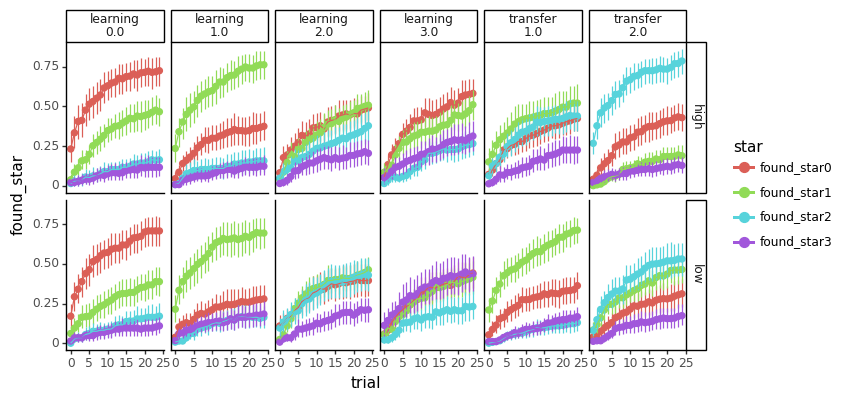

<ggplot: (143156661634)>

In [115]:
all_data3_l['found_star'] = all_data3_l['found_star'].astype(int)
subj_dat = all_data3_l.groupby(['sid', 'phase', 'trial_type', 'goal_star', 'star', 'trial']).aggregate('mean').reset_index()

g = (gg.ggplot(subj_dat, gg.aes('trial', 'found_star', color='star'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.facet_grid('phase ~ trial_type + goal_star')
    )
g

In [100]:
id_cols = ['sid', 'phase', 'trial_type', 'block', 'trial', 'subtrial', 'unlocked_star', 'goal_star']
inplace_count_cols = ['star{}_inplace_count'.format(s) for s in range(4)]

all_data_m = all_data3[id_cols + inplace_count_cols].melt(id_vars=id_cols, var_name='inplace_star', value_name='trials_inplace')
all_data_m['inplace_star'] = all_data_m['inplace_star'].apply(lambda x : int(x.split('_')[0][-1]))
all_data_m['got_inplace_star'] = all_data_m['unlocked_star'] == all_data_m['inplace_star']
all_data_m['inplace_star_is_goal_star'] = all_data_m['inplace_star'] == all_data_m['goal_star']

all_data_m

,sid,phase,trial_type,block,trial,subtrial,unlocked_star,goal_star,inplace_star,trials_inplace,got_inplace_star,inplace_star_is_goal_star,bool_star0,found_star0,bool_star1,found_star1,bool_star2,found_star2,bool_star3,found_star3
0,13885,high,learning,0.0,0.0,3,-1.0,3.0,0,0,False,False,False,False,False,False,False,False,False,False
49000,13885,high,learning,0.0,0.0,3,-1.0,3.0,1,0,False,False,False,False,False,False,False,False,False,False
98000,13885,high,learning,0.0,0.0,3,-1.0,3.0,2,0,False,False,False,False,False,False,False,False,False,False
147000,13885,high,learning,0.0,0.0,3,-1.0,3.0,3,0,False,True,False,False,False,False,False,False,False,False
1,13885,high,learning,0.0,1.0,3,-1.0,3.0,0,0,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195467,39520,low,transfer,7.0,23.0,3,2.0,2.0,3,0,False,False,False,True,False,False,True,True,False,False
48468,39520,low,transfer,7.0,24.0,3,2.0,2.0,0,20,False,False,False,True,False,False,True,True,False,False
97468,39520,low,transfer,7.0,24.0,3,2.0,2.0,1,25,False,False,False,True,False,False,True,True,False,False
146468,39520,low,transfer,7.0,24.0,3,2.0,2.0,2,0,True,True,False,True,False,False,True,True,False,False


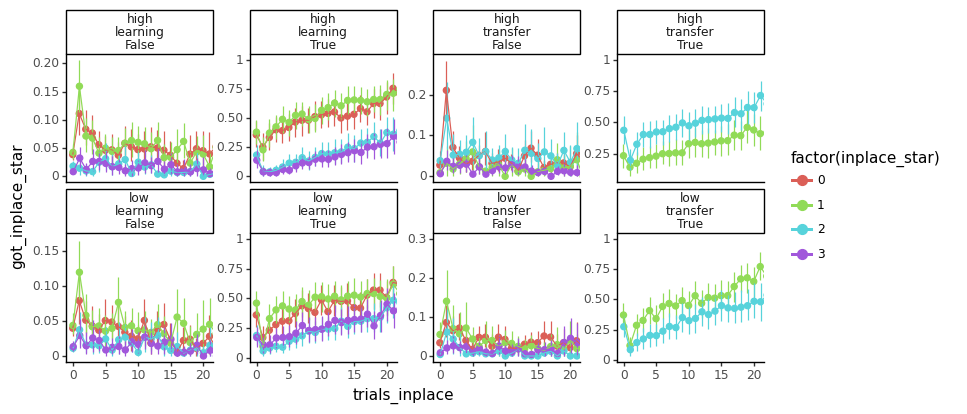

<ggplot: (143152173008)>

In [63]:
subj_dat = all_data_m.groupby(
        ['sid', 'phase', 'trial_type', 'trials_inplace', 'inplace_star', 'goal_star', 'inplace_star_is_goal_star']
    ).aggregate('mean').reset_index()

# Take away: accidental discovery (inplace_star_is_goal_star==False) peaks at 1 item post availability
    # -> people explore, recombine, are creative!!!
# Nevertheless, most correct stars are found before sub-sequences have been acquired -> 4 keys just appear
# Questions: Do both happen at different trials?
# Patterns after differ too: accidental decreases slowly, showing that people keep repeating; correct drops down,
# showing disbelief maybe?
gg.options.figure_size = (9, 4)
g = (gg.ggplot(subj_dat, gg.aes('trials_inplace', 'got_inplace_star', color='factor(inplace_star)'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.coord_cartesian(xlim=(0, 20.5))#, ylim=(0, 0.3))
     + gg.theme(subplots_adjust={'wspace': 0.25})
     + gg.facet_wrap('~ phase + trial_type + inplace_star_is_goal_star', scales='free_y', ncol=4)
    )
g

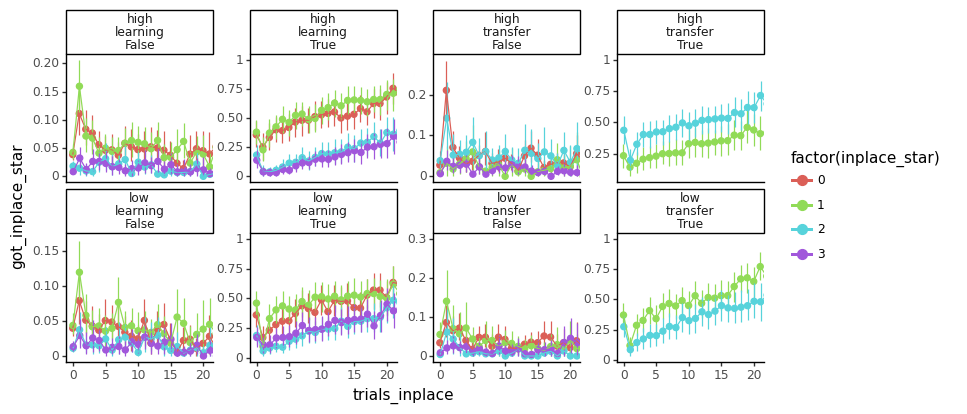

<ggplot: (143152173008)>

In [63]:
subj_dat = all_data_m.groupby(
        ['sid', 'phase', 'trial_type', 'trials_inplace', 'inplace_star', 'goal_star', 'inplace_star_is_goal_star']
    ).aggregate('mean').reset_index()

# Take away: accidental discovery (inplace_star_is_goal_star==False) peaks at 1 item post availability
    # -> people explore, recombine, are creative!!!
# Nevertheless, most correct stars are found before sub-sequences have been acquired -> 4 keys just appear
# Questions: Do both happen at different trials?
# Patterns after differ too: accidental decreases slowly, showing that people keep repeating; correct drops down,
# showing disbelief maybe?
gg.options.figure_size = (9, 4)
g = (gg.ggplot(subj_dat, gg.aes('trials_inplace', 'got_inplace_star', color='factor(inplace_star)'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.coord_cartesian(xlim=(0, 20.5))#, ylim=(0, 0.3))
     + gg.theme(subplots_adjust={'wspace': 0.25})
     + gg.facet_wrap('~ phase + trial_type + inplace_star_is_goal_star', scales='free_y', ncol=4)
    )
g

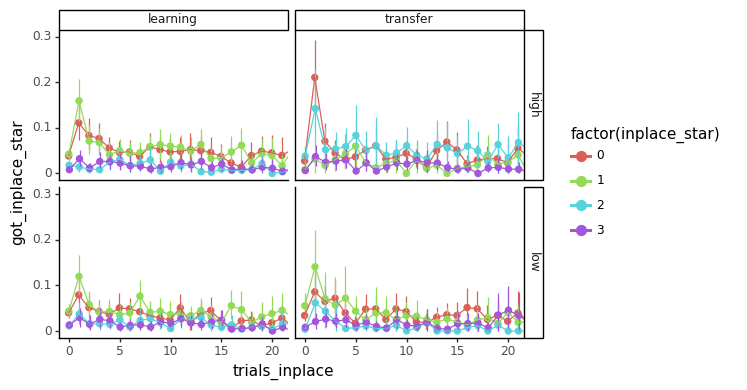

<ggplot: (143107065549)>

In [64]:
subj_dat = all_data_m.loc[
        (all_data_m['goal_star'] != all_data_m['inplace_star']) #& (all_data_m['block'] == 0)
    ].groupby(
        ['sid', 'phase', 'trial_type', 'trials_inplace', 'inplace_star', 'goal_star', 'inplace_star_is_goal_star']
    ).aggregate('mean').reset_index()

gg.options.figure_size = (6, 4)
g = (gg.ggplot(subj_dat, gg.aes('trials_inplace', 'got_inplace_star', color='factor(inplace_star)'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.coord_cartesian(xlim=(0, 20.5), ylim=(0, 0.3))
     + gg.facet_grid('phase ~ trial_type')
    )
g

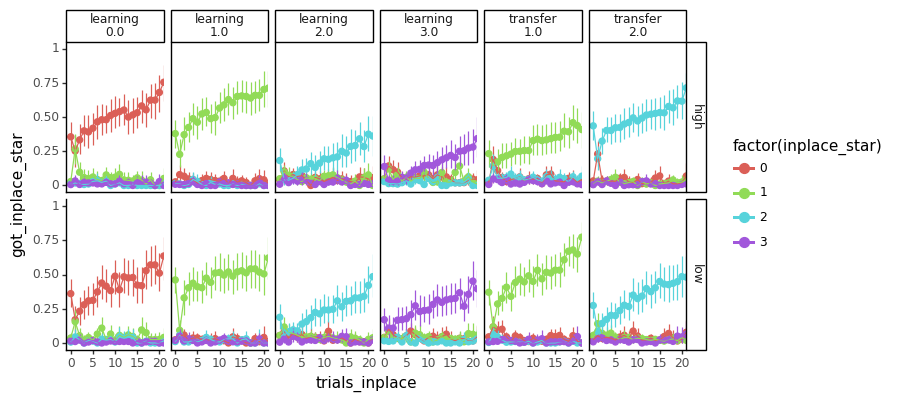

<ggplot: (143107479489)>

In [65]:
subj_dat = all_data_m.groupby(
    ['sid', 'phase', 'trial_type', 'trials_inplace', 'inplace_star', 'goal_star']
).aggregate('mean').reset_index()

# Issue: got_inplace_star does not indicate the FIRST obtainment of the inplace_star, but any... 
# so it's confounded with overall accuracy
    # could only plot first obtainment
    # or focus on non-goal stars?
gg.options.figure_size = (8, 4)
g = (gg.ggplot(subj_dat, gg.aes('trials_inplace', 'got_inplace_star', color='factor(inplace_star)'))
     + gg.stat_summary()
     + gg.stat_summary(geom='line')
     + gg.coord_cartesian(xlim=(0, 20))
     + gg.facet_grid('phase ~ trial_type + goal_star')
    )
g

## Time to discover each star

In [18]:
id_cols = ['sid', 'trial_type', 'phase', 'block', 'goal_star']
all_data['bool_unlocked_star'] = (np.invert(np.isnan(all_data['unlocked_star'])) & (all_data['unlocked_star'] > -1))
first_dat_high = all_data.loc[all_data['bool_unlocked_star']].groupby(id_cols).aggregate('min').reset_index()[id_cols + ['trial']]
first_dat_high['n_unique_items'] = get_n_unique_items(first_dat_high)
first_dat_high

,sid,trial_type,phase,block,goal_star,trial,n_unique_items
0,13885,learning,high,0.0,3.0,5.0,3.0
1,13885,learning,high,1.0,2.0,0.0,3.0
2,13885,learning,high,2.0,1.0,2.0,4.0
3,13885,learning,high,3.0,0.0,1.0,4.0
4,13885,learning,high,4.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...
1828,39520,transfer,low,3.0,2.0,3.0,3.0
1829,39520,transfer,low,4.0,1.0,0.0,4.0
1830,39520,transfer,low,5.0,2.0,11.0,3.0
1831,39520,transfer,low,6.0,1.0,2.0,4.0


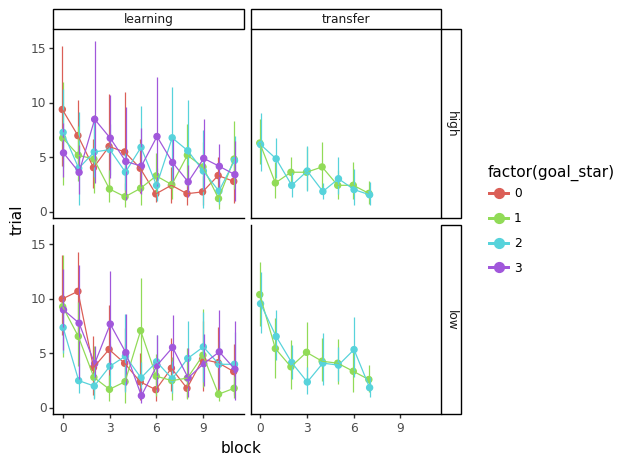

<ggplot: (143155462163)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 105_trialtofirstOverBlockForStars.png


In [19]:
subj_dat = first_dat_high#diff_dat.loc[diff_dat['exists']].groupby(['sid', 'phase', 'trial_type', 'block', 'middle_item_both']).aggregate('mean').reset_index()

gg.options.figure_size = (5, 5)
g = (gg.ggplot(subj_dat, gg.aes('block', 'trial', color='factor(goal_star)', group='factor(goal_star)'))
     + gg.stat_summary(position=gg.position_dodge(width=0.1))
     + gg.stat_summary(position=gg.position_dodge(width=0.1), geom='line')
     + gg.facet_grid('phase ~ trial_type')
    )
print(g)
g.save(os.path.join('105_trialtofirstOverBlockForStars.png'))

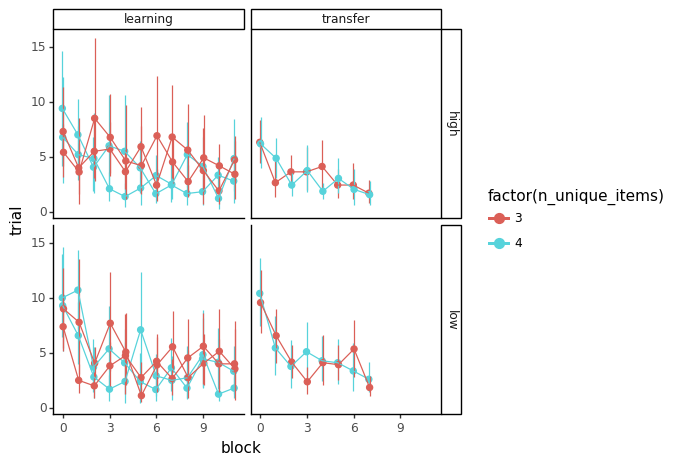

<ggplot: (143155462163)>


C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\maria\Anaconda3\envs\notebooks\lib\site-packages\plotnine\ggplot.py:730: PlotnineWarning: Filename: 105_trialtofirstOverBlockForNuniqueitems.png


In [20]:
g += gg.aes(color='factor(n_unique_items)')
print(g)
g.save(os.path.join('105_trialtofirstOverBlockForNuniqueitems.png'))